***
**Table des matières :**
* [1. Analyse sur les objets trouvés de grandes gares SNCF en 2020](#1)
    * [1.1 Les 10 gares avec les plus d'objets trouvés](#11)
    * [1.2 Les 10 natures d'objet les plus trouvées](#12)
    * [1.3 Les 10 types d'objet les plus trouvés](#13)
    * [1.4 La répartition annuelle des objets trouvés](#14)
    * [1.5 La répartition des objets trouvés dans la semaine](#15)
    * [1.6. La répartition des objets trouvés dans la journée](#16)
* [2. Analyse sur le nombre de personnes ayant attendu en espace de vente de grandes gares SNCF en 2019-2021](#2)
    * [2.1 La tendance au niveau du nombre de personnes ayant attentu plus de 30 minutes](#21)
    * [2.2 La tendance au niveau du nombre de personnes ayant attentu plus de 60 minutes](#22)
    * [2.3 La répartition du nombre de personnes ayant attendu en espace de vente dans chaque grande gare](#23)
***

**Étudiant :**
- Zhifeng LIANG

<a id='1'></a>
# **Analyse sur les objets trouvés de grandes gares SNCF en 2020**

In [1]:
import calendar
import locale
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspark.sql import SparkSession

In [2]:
locale.setlocale(locale.LC_ALL, 'fr_FR')

'fr_FR'

In [3]:
# create SparkSession
spark = SparkSession.builder.master("local[*]") \
                    .appName('SparkSNCF') \
                    .getOrCreate()

# extract SparkContext
sc = spark.sparkContext

print('Spark is ready with CPU usage :', sc.defaultParallelism)

Spark is ready with CPU usage : 4


In [4]:
table_lost = sc.textFile('sncf-lost-data-2020.csv')

In [5]:
header_lost = table_lost.take(1)
table_lost_no_header = table_lost.filter(lambda row: row != header_lost[0])
print("Number of rows: ", table_lost_no_header.count())
table_lost_splited = table_lost_no_header.map(lambda line: line.split(';'))

Number of rows:  62042


<a id='11'></a>
## **1.1 Les 10 gares avec les plus d'objets trouvés**

In [6]:
def get_top_10(n_column):
    data = table_lost_splited.map(lambda line: (line[n_column], 1)) \
                            .reduceByKey(lambda a,b:a + b) \
                            .sortBy(lambda pair: pair[1], ascending=False)
    return data.collect()[:10]

In [7]:
stations_top_10 = get_top_10(2)

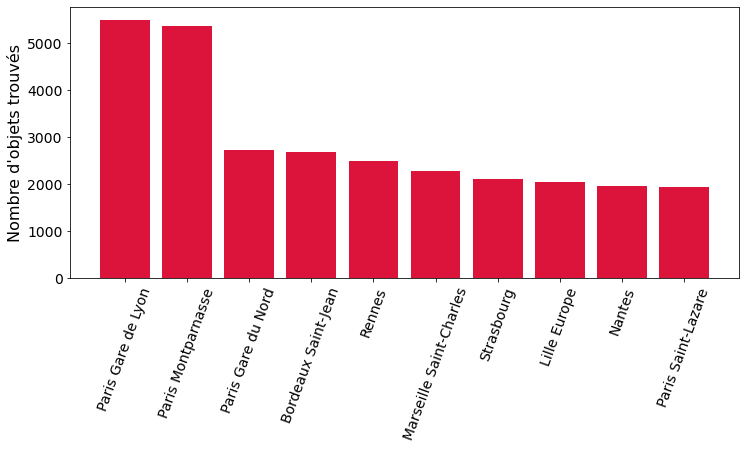

In [8]:
plt.figure(figsize=(12,5))
plt.bar(range(len(stations_top_10)), [val[1] for val in stations_top_10], color='crimson')
plt.xticks(range(len(stations_top_10)), [val[0] for val in stations_top_10], rotation=70, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre d\'objets trouvés', fontsize=16)
plt.show()

<a id='12'></a>
## **1.2 Les 10 natures d'objet les plus trouvées**

In [9]:
objects_nature_top_10 = get_top_10(4)

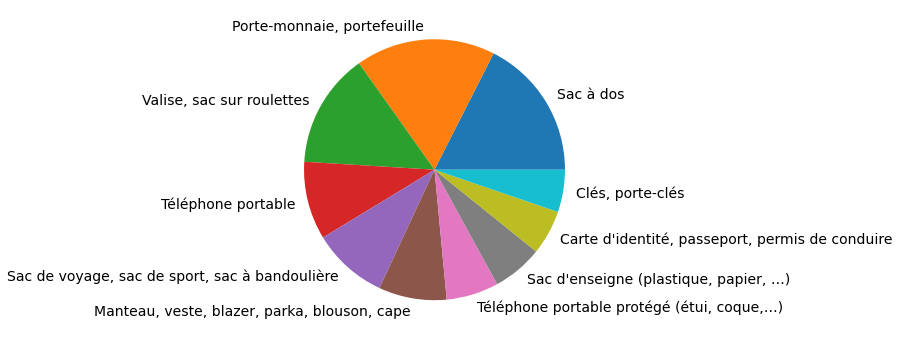

In [10]:
plt.figure(figsize=(12,6))
plt.pie([val[1] for val in objects_nature_top_10], labels = [val[0] for val in objects_nature_top_10], textprops={'fontsize': 14})
plt.show()

<a id='13'></a>
## **1.3 Les 10 types d'objet les plus trouvés**

In [11]:
objects_type_top_10 = get_top_10(5)

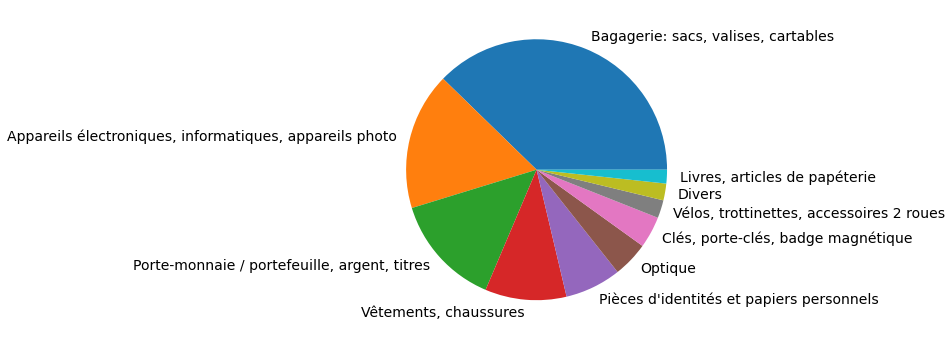

In [12]:
plt.figure(figsize=(12,6))
plt.pie([val[1] for val in objects_type_top_10], labels = [val[0] for val in objects_type_top_10], textprops={'fontsize': 14})
plt.show()

<a id='14'></a>
## **1.4 La répartition annuelle des objets trouvés**

In [13]:
months = table_lost_splited.map(lambda line: (line[0].split('-')[1], 1)) \
                    .reduceByKey(lambda a,b:a + b) \
                    .sortBy(lambda pair: pair[0], ascending=True)

months_collected = months.collect()

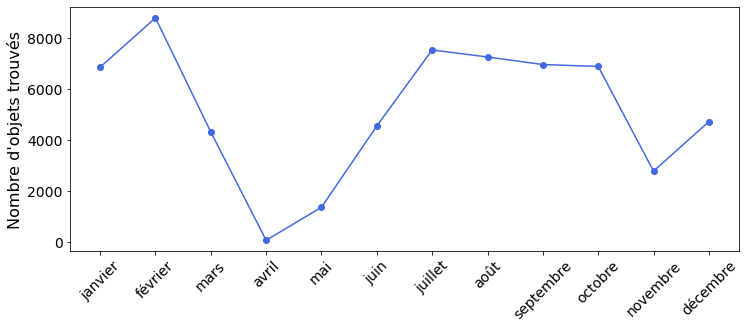

In [14]:
plt.figure(figsize=(12,4.5))
plt.plot([val[1] for val in months_collected], color='royalblue', marker='o')
plt.xticks(range(len(months_collected)), [calendar.month_name[int(val[0])] for val in months_collected], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre d\'objets trouvés', fontsize=16)
plt.show()

<a id='15'></a>
## **1.5 La répartition des objets trouvés dans la semaine**

In [15]:
weekdays = table_lost_splited.map(lambda line: (datetime.datetime.strptime(line[0].split('T')[0], '%Y-%m-%d').weekday(), 1)) \
                    .reduceByKey(lambda a,b:a + b) \
                    .sortBy(lambda pair: pair[0], ascending=True)

weekdays_collected = weekdays.collect()

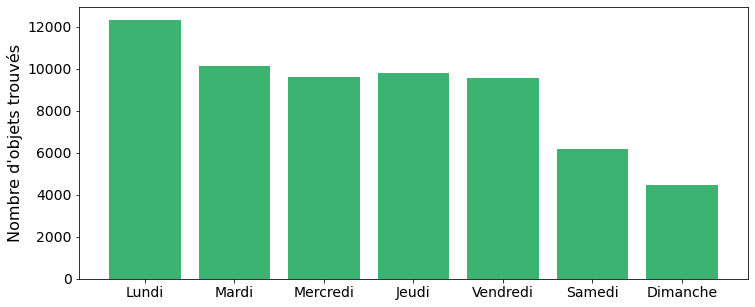

In [16]:
plt.figure(figsize=(12,5))
plt.bar(range(len(weekdays_collected)), [val[1] for val in weekdays_collected], color='mediumseagreen')
plt.xticks(range(len(weekdays_collected)), [calendar.day_name[val[0]] for val in weekdays_collected], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre d\'objets trouvés', fontsize=16)
plt.show()

<a id='16'></a>
## **1.6 La répartition des objets trouvés dans la journée**

In [17]:
hours = table_lost_splited.map(lambda line: (line[0].split('T')[1].split(':')[0], 1)) \
                    .reduceByKey(lambda a,b:a + b) \
                    .sortBy(lambda pair: pair[0], ascending=True)

hours_collected = hours.collect()

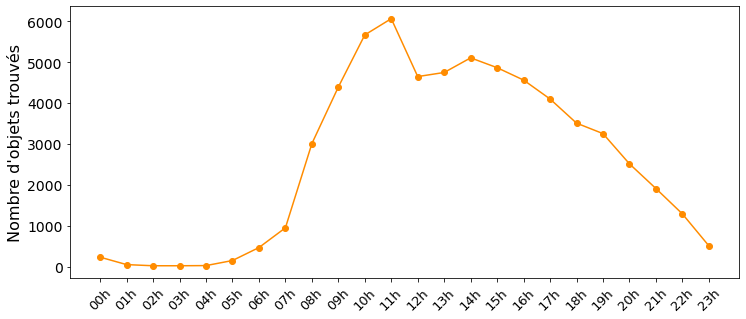

In [18]:
plt.figure(figsize=(12,5))
plt.plot([val[1] for val in hours_collected], color='darkorange', marker='o')
plt.xticks(range(len(hours_collected)), [val[0] + 'h' for val in hours_collected], rotation=45, fontsize=13)
plt.yticks(fontsize=14)
plt.ylabel('Nombre d\'objets trouvés', fontsize=16)
plt.show()

<a id='2'></a>
# **Analyse sur le nombre de personnes ayant attendu en espace de vente de grandes gares SNCF en 2019-2021**

In [19]:
table_waiting = sc.textFile('attente-au-guichet.csv')

In [20]:
header_waiting = table_waiting.take(1)
table_waiting_no_header = table_waiting.filter(lambda row: row != header_waiting[0])
print("Number of rows: ", table_waiting_no_header.count())
table_waiting_splited = table_waiting_no_header.map(lambda line: line.split(';'))

Number of rows:  3949


<a id='21'></a>
## **2.1 La tendance au niveau du nombre de personnes ayant attentu plus de 30 minutes**

In [21]:
def get_dates_time(n_column):
    dates_time = table_waiting_splited.filter(lambda line: line[n_column] != '') \
                                    .map(lambda line: (datetime.datetime.strptime(line[2], '%Y-%m-%d'), int(float(line[n_column])))) \
                                    .reduceByKey(lambda a,b:a + b) \
                                    .sortBy(lambda pair: pair[0])
    return dates_time.collect()

In [22]:
dates_time_30 = get_dates_time(3)

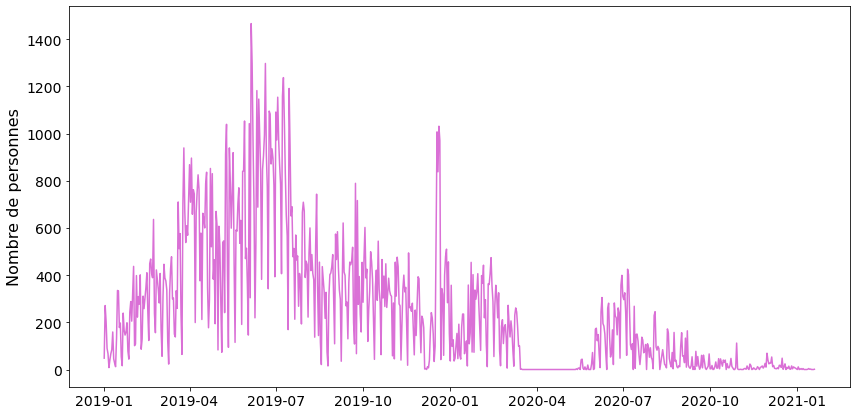

In [23]:
plt.figure(figsize=(14,7))
plt.plot([val[0] for val in dates_time_30], [val[1] for val in dates_time_30], color='orchid')
# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
# plt.gcf().autofmt_xdate() # Rotation
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre de personnes', fontsize=16)
plt.show()

<a id='22'></a>
## **2.2 La tendance au niveau du nombre de personnes ayant attentu plus de 60 minutes**

In [24]:
dates_time_60 = get_dates_time(4)

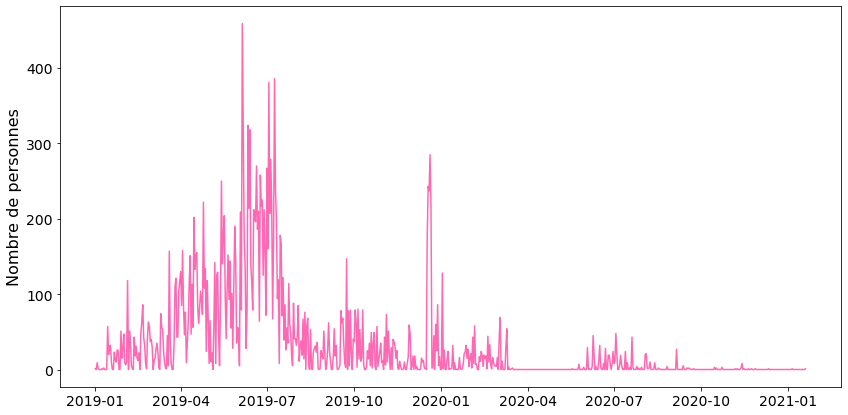

In [25]:
plt.figure(figsize=(14,7))
plt.plot([val[0] for val in dates_time_60], [val[1] for val in dates_time_60], color='hotpink')
# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
# plt.gcf().autofmt_xdate() # Rotation
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre de personnes', fontsize=16)
plt.show()

<a id='23'></a>
## **2.3 La répartition du nombre de personnes ayant attendu en espace de vente dans chaque grande gare**

In [26]:
def get_stations_time(n_column):
    stations_time = table_waiting_splited.filter(lambda line: line[n_column] != '') \
                                        .map(lambda line: (line[0], int(float(line[n_column])))) \
                                        .reduceByKey(lambda a,b:a + b) \
                                        .sortBy(lambda pair: pair[0], ascending=False)
    return stations_time.collect()

In [27]:
stations_time_30 = get_stations_time(3)
stations_time_60 = get_stations_time(4)

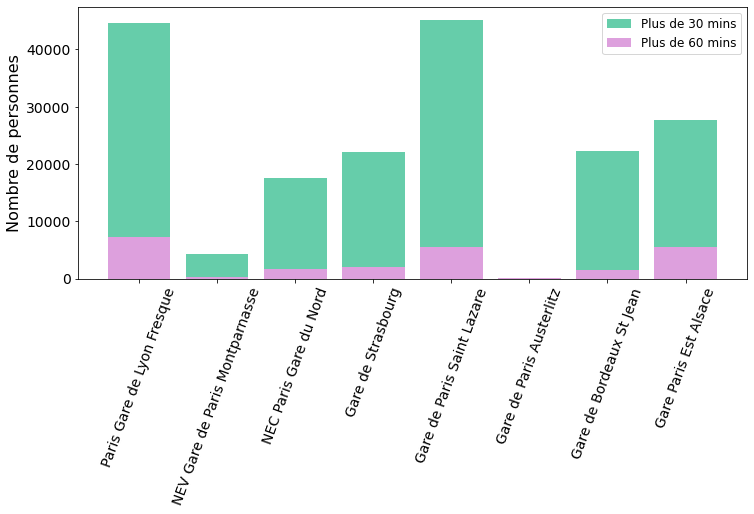

In [28]:
plt.figure(figsize=(12,5))
plt.bar(range(len(stations_time_30)), [val[1] for val in stations_time_30], color='mediumaquamarine')
plt.bar(range(len(stations_time_60)), [val[1] for val in stations_time_60], color='plum')
plt.xticks(range(len(stations_time_30)), [val[0] for val in stations_time_30], rotation = 70, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre de personnes', fontsize=16)
plt.legend(['Plus de 30 mins', 'Plus de 60 mins'], fontsize=12)
plt.show()